In [1]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [53]:
names = dict()
with open('../data/heroes.json') as f:
    data = json.load(f)
    for i in data:
        names[i["id"]] = i['localized_name']
df_heroes = pd.DataFrame.from_dict(names, orient='index', columns=['name'])

In [3]:
df = pd.DataFrame.from_csv("../data/liquid_picks_bans.csv")
df_win = pd.DataFrame.from_csv("../data/liquid_wins.csv")
df.head()

,hero_id,is_pick,match_id,ord,order,team
0,63,False,5490431444,0,0,Team Liquid
1,110,False,5490431444,1,1,Team Secret
2,126,False,5490431444,2,2,Team Liquid
3,106,False,5490431444,3,3,Team Secret
4,66,False,5490431444,4,4,Team Liquid


In [4]:
df_win.head()

,match_id,winner
0,5490431444,Team Secret
1,5490337091,Team Secret
2,5488049930,Nigma
3,5487987325,Nigma
4,5487920183,Team Liquid


In [5]:
df_names = df.replace({'hero_id' : names})
df_names.head(10)

,hero_id,is_pick,match_id,ord,order,team
0,Weaver,False,5490431444,0,0,Team Liquid
1,Phoenix,False,5490431444,1,1,Team Secret
2,Void Spirit,False,5490431444,2,2,Team Liquid
3,Ember Spirit,False,5490431444,3,3,Team Secret
4,Chen,False,5490431444,4,4,Team Liquid
5,Vengeful Spirit,False,5490431444,5,5,Team Secret
6,Enchantress,False,5490431444,6,6,Team Liquid
7,Oracle,False,5490431444,7,7,Team Secret
8,Treant Protector,True,5490431444,8,8,Team Liquid
9,Batrider,True,5490431444,9,9,Team Secret


In [6]:
bans = df_names['is_pick'] == False
df_bans = df_names[bans]
picks = df_names['is_pick'] == True
df_picks = df_names[picks]
df_picks.head(10)

,hero_id,is_pick,match_id,ord,order,team
8,Treant Protector,True,5490431444,8,8,Team Liquid
9,Batrider,True,5490431444,9,9,Team Secret
10,Earth Spirit,True,5490431444,10,10,Team Secret
11,Queen of Pain,True,5490431444,11,11,Team Liquid
14,Puck,True,5490431444,14,14,Team Secret
15,Disruptor,True,5490431444,15,15,Team Liquid
16,Kunkka,True,5490431444,16,16,Team Secret
17,Lone Druid,True,5490431444,17,17,Team Liquid
20,Pangolier,True,5490431444,20,20,Team Liquid
21,Broodmother,True,5490431444,21,21,Team Secret


In [7]:
def bar_plot(df, title, figsize=(5,15), number_col = None):
    df.value_counts().iloc[:number_col].plot(kind = 'barh', figsize=figsize, title = title)

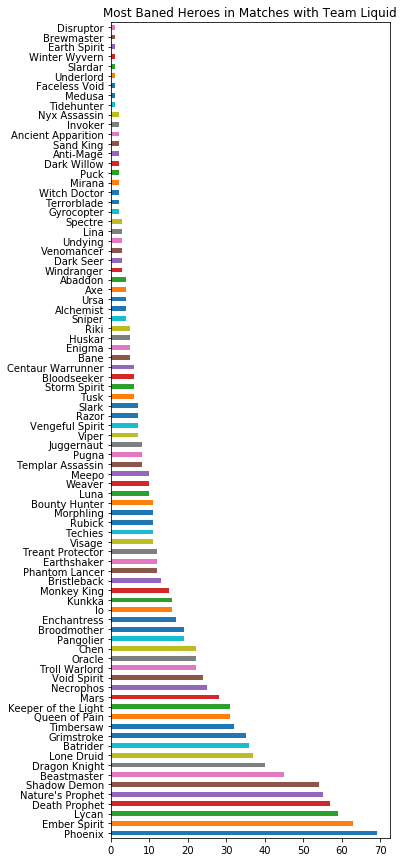

In [8]:
bar_plot(df_bans['hero_id'], "Most Baned Heroes in Matches with Team Liquid")

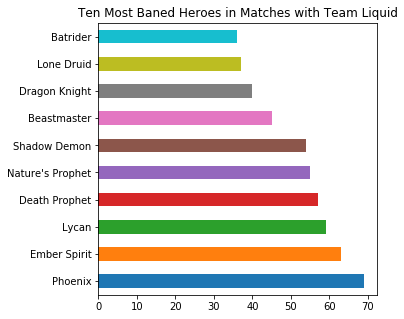

In [9]:
bar_plot(df_bans['hero_id'], "Ten Most Baned Heroes in Matches with Team Liquid", figsize=(5,5), number_col=10)

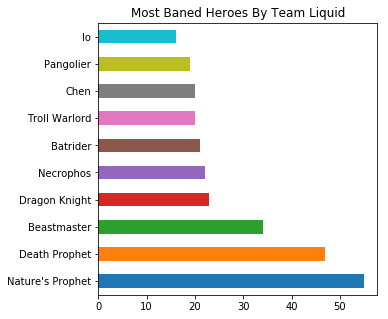

In [10]:
mask = df_bans['team'] == 'Team Liquid'
bar_plot(df_bans[mask]['hero_id'], "Most Baned Heroes By Team Liquid", figsize=(5,5), number_col=10)

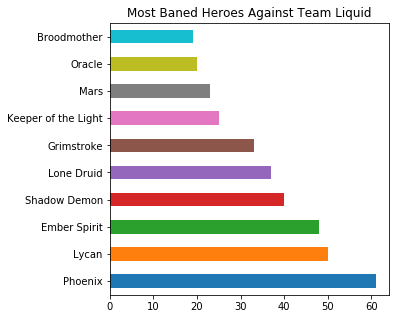

In [11]:
bar_plot(df_bans[~mask]['hero_id'], "Most Baned Heroes Against Team Liquid", figsize=(5,5), number_col=10)

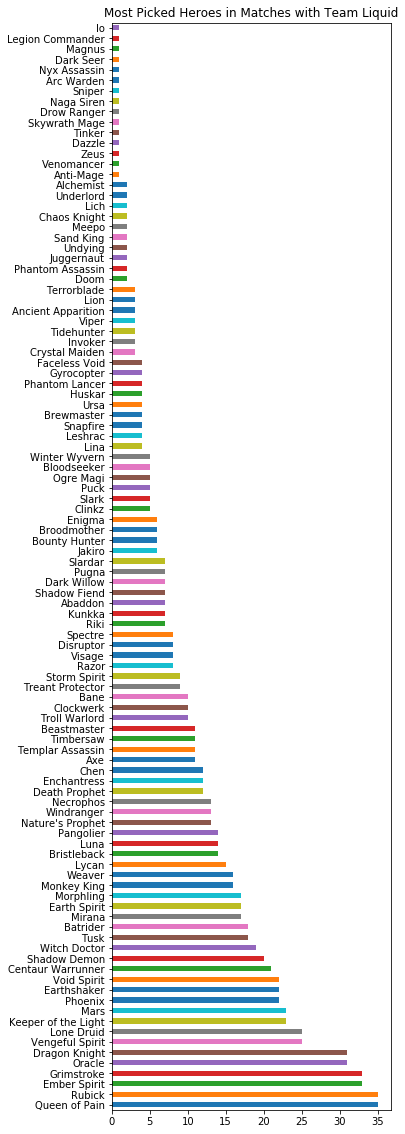

In [12]:
bar_plot(df_picks['hero_id'], "Most Picked Heroes in Matches with Team Liquid", figsize=(5,20))

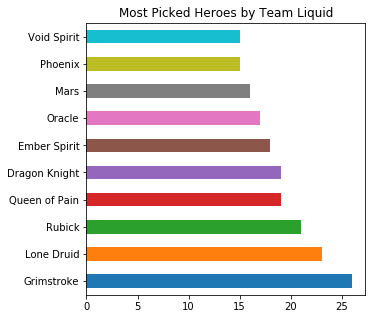

In [13]:
mask = df_picks['team'] == 'Team Liquid'
bar_plot(df_picks[mask]['hero_id'], "Most Picked Heroes by Team Liquid", figsize=(5,5), number_col=10)

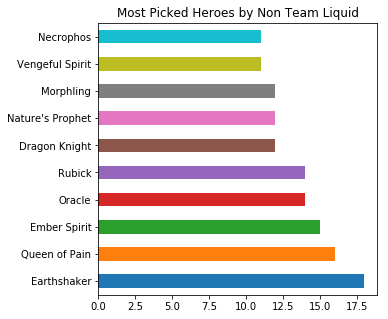

In [14]:
bar_plot(df_picks[~mask]['hero_id'], "Most Picked Heroes by Non Team Liquid", figsize=(5,5), number_col=10)

In [108]:
df_picks_wins = df_picks.merge(df_win, how='left', left_on='match_id', right_on='match_id')
liquid_pick = df_picks_wins['team'] == "Team Liquid"
df_liquid_picks = df_picks_wins[liquid_pick]
liquid_loss = df_liquid_picks[df_liquid_picks.winner != "Team Liquid"].hero_id.value_counts().rename('number_of_losses')
liquid_win = df_liquid_picks[df_liquid_picks.winner == "Team Liquid"].hero_id.value_counts().rename('number_of_wins')
df_win_loss = df_heroes.merge(liquid_loss.to_frame(), how='left', left_on='name', right_index=True, ).merge(liquid_win.to_frame(), how='left', left_on='name', right_index=True).fillna(0)
df_win_loss['win_delta'] = (df_win_loss['number_of_wins'] - df_win_loss['number_of_losses']) / len(df_win)
df_win_loss['pressence'] = (df_win_loss['number_of_wins'] + df_win_loss['number_of_losses']) / len(df_win)
df_win_loss = df_win_loss[df_win_loss['pressence'] > 0]

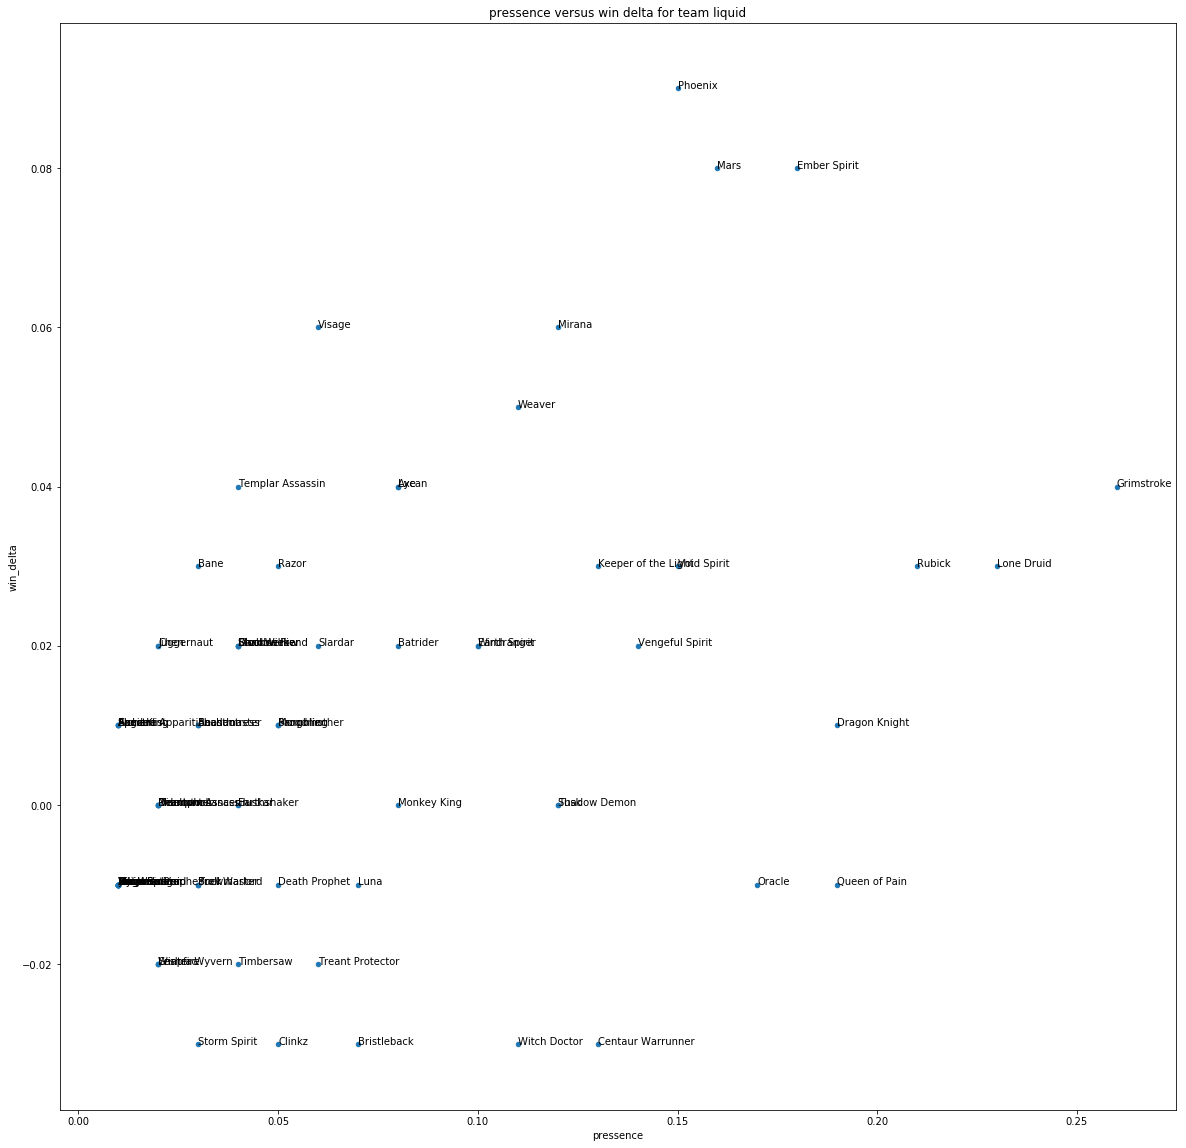

In [115]:
fig, ax = plt.subplots(figsize=(20,20))
ax.set_title("pressence versus win delta for team liquid")
df_win_loss.plot('pressence', 'win_delta', kind='scatter', ax=ax)
for i, xy in df_win_loss[['name','pressence', 'win_delta']].iterrows():
    ax.annotate(xy[0], xy[1:])
fig.canvas.draw()